In [1]:
import os
import datetime

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Load the Data

In [2]:
data_input_dir = "../data/processed"
input_file = os.path.join(data_input_dir, "ep", "merged_data.parquet")

splits_output_dir = "../data/processed/splits"
os.makedirs(splits_output_dir, exist_ok=True)

In [3]:
ep_df = pd.read_parquet(input_file)
print(ep_df.shape)

(14196903, 7)


In [4]:
ep_df.head()

,ride_name,timestamp,wait_time,closed,temperature,rain,wind
0,alpine express enzian,2017-05-23 09:00:00,1.0,False,18.7,0.0,1.1
1,poppy towers,2017-05-23 09:00:00,0.0,False,18.7,0.0,1.1
2,silver star,2017-05-23 09:00:00,0.0,False,18.7,0.0,1.1
3,swiss bob run,2017-05-23 09:00:00,1.0,False,18.7,0.0,1.1
4,tirol log flume,2017-05-23 09:00:00,1.0,False,18.7,0.0,1.1


## Create the Splits

We will split the data into a training, validation and test set using the following methology:
- 2017 - 2022: Training
- 2023: Validation
- 2024: Test

This approximates a commonly used 80/10/10 split.

In [5]:
train_indices = ep_df[ep_df["timestamp"] < datetime.datetime(2023, 1, 1)].index
validation_indices = ep_df[(ep_df["timestamp"] >= datetime.datetime(2023, 1, 1)) & (ep_df["timestamp"] < datetime.datetime(2024, 1, 1))].index
test_indices = ep_df[ep_df["timestamp"] >= datetime.datetime(2024, 1, 1)].index

Check the shapes of the splits to ensure they contain the correct number of rows.

In [6]:
train_indices.shape, validation_indices.shape, test_indices.shape

((10485477,), (1852375,), (1859051,))

We print the first and last few indices of each split to ensure the data is correctly split.

In [7]:
print(train_indices[:5], train_indices[-5:])
print(validation_indices[:5], validation_indices[-5:])
print(test_indices[:5], test_indices[-5:])

Index([0, 1, 2, 3, 4], dtype='int64') Index([10485472, 10485473, 10485474, 10485475, 10485476], dtype='int64')
Index([10485477, 10485478, 10485479, 10485480, 10485481], dtype='int64') Index([12337847, 12337848, 12337849, 12337850, 12337851], dtype='int64')
Index([12337852, 12337853, 12337854, 12337855, 12337856], dtype='int64') Index([14196898, 14196899, 14196900, 14196901, 14196902], dtype='int64')


Also print the first few timestamps of each split to ensure the data doesn't overlap between splits.

In [8]:
print("Train set:")
print(ep_df.loc[train_indices[:5], ["timestamp"]])
print(ep_df.loc[train_indices[-5:], ["timestamp"]])
print()
print("Validation set:")
print(ep_df.loc[validation_indices[:5], ["timestamp"]])
print(ep_df.loc[validation_indices[-5:], ["timestamp"]])
print()
print("Test set:")
print(ep_df.loc[test_indices[:5], ["timestamp"]])
print(ep_df.loc[test_indices[-5:], ["timestamp"]])

Train set:
            timestamp
0 2017-05-23 09:00:00
1 2017-05-23 09:00:00
2 2017-05-23 09:00:00
3 2017-05-23 09:00:00
4 2017-05-23 09:00:00
                   timestamp
10485472 2022-12-31 21:00:00
10485473 2022-12-31 21:00:00
10485474 2022-12-31 21:00:00
10485475 2022-12-31 21:00:00
10485476 2022-12-31 21:00:00

Validation set:
                   timestamp
10485477 2023-01-01 09:00:00
10485478 2023-01-01 09:00:00
10485479 2023-01-01 09:00:00
10485480 2023-01-01 09:00:00
10485481 2023-01-01 09:00:00
                   timestamp
12337847 2023-12-31 21:00:00
12337848 2023-12-31 21:00:00
12337849 2023-12-31 21:00:00
12337850 2023-12-31 21:00:00
12337851 2023-12-31 21:00:00

Test set:
                   timestamp
12337852 2024-01-01 09:00:00
12337853 2024-01-01 09:00:00
12337854 2024-01-01 09:00:00
12337855 2024-01-01 09:00:00
12337856 2024-01-01 09:00:00
                   timestamp
14196898 2024-12-31 21:00:00
14196899 2024-12-31 21:00:00
14196900 2024-12-31 21:00:00
14196901 2024-12-

Calculate percentage of data in each split

In [9]:
total_records = len(ep_df)
train_percentage = len(train_indices) / total_records * 100
validation_percentage = len(validation_indices) / total_records * 100
test_percentage = len(test_indices) / total_records * 100

print(f"Total records: {total_records}")
print(f"Training set: {len(train_indices)} records ({train_percentage:.2f}%)")
print(f"Validation set: {len(validation_indices)} records ({validation_percentage:.2f}%)")
print(f"Test set: {len(test_indices)} records ({test_percentage:.2f}%)")

Total records: 14196903
Training set: 10485477 records (73.86%)
Validation set: 1852375 records (13.05%)
Test set: 1859051 records (13.09%)


Finally, we save the splits to parquet files for further use.

In [10]:
train_indices_series = pd.DataFrame(train_indices)
validation_indices_series = pd.DataFrame(validation_indices)
test_indices_series = pd.DataFrame(test_indices)

train_output_file = os.path.join(splits_output_dir, "train_indices.parquet")
validation_output_file = os.path.join(splits_output_dir, "validation_indices.parquet")
test_output_file = os.path.join(splits_output_dir, "test_indices.parquet")

train_indices_series.to_parquet(train_output_file, index=False)
validation_indices_series.to_parquet(validation_output_file, index=False)
test_indices_series.to_parquet(test_output_file, index=False)

## Create Charts

Create a pie chart showing the split proportions

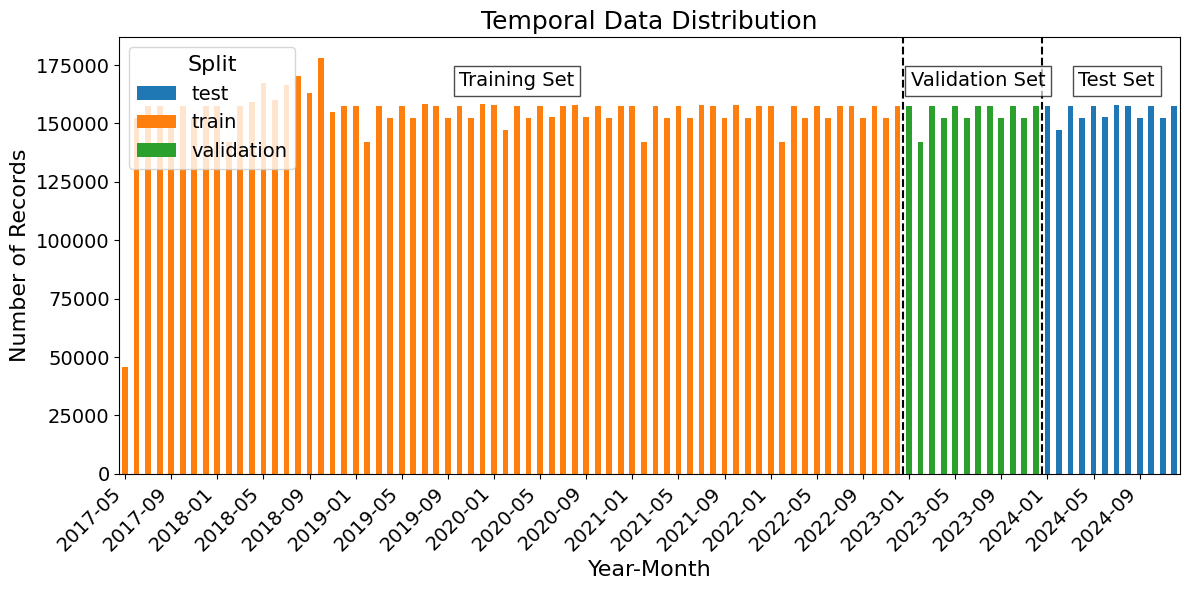

In [22]:
# Create a copy of the DataFrame with a new column indicating the split
ep_df_with_split = ep_df.copy()
ep_df_with_split['split'] = 'unknown'
ep_df_with_split.loc[train_indices, 'split'] = 'train'
ep_df_with_split.loc[validation_indices, 'split'] = 'validation'
ep_df_with_split.loc[test_indices, 'split'] = 'test'

# Count records by month for each split
ep_df_with_split['year_month'] = ep_df_with_split['timestamp'].dt.to_period('M')
monthly_counts = ep_df_with_split.groupby(['year_month', 'split']).size().unstack(fill_value=0)

# Create the plot
plt.figure(figsize=(12, 6))
monthly_counts.plot(kind='bar', stacked=True, ax=plt.gca(), 
                   color=['#1f77b4', '#ff7f0e', '#2ca02c'])  # Different colors for each split

plt.title('Temporal Data Distribution', fontsize=18)
plt.xlabel('Year-Month', fontsize=16)
plt.ylabel('Number of Records', fontsize=16)

# Display only every 4th month label
xtick_positions = range(len(monthly_counts.index))
xtick_labels = monthly_counts.index.astype(str)
plt.xticks(xtick_positions[::4], xtick_labels[::4], rotation=45, ha='right', fontsize=14)

# Add vertical lines to separate the splits
jan_2023_idx = monthly_counts.index.get_loc(pd.Period('2023-01'))
jan_2024_idx = monthly_counts.index.get_loc(pd.Period('2024-01'))
plt.axvline(x=jan_2023_idx - 0.5, color='black', linestyle='--')
plt.axvline(x=jan_2024_idx - 0.5, color='black', linestyle='--')

# Add split annotations
mid_train_idx = jan_2023_idx // 2
mid_val_idx = jan_2023_idx + (jan_2024_idx - jan_2023_idx) // 2
mid_test_idx = jan_2024_idx + (len(monthly_counts) - jan_2024_idx) // 2

plt.text(mid_train_idx, plt.ylim()[1]*0.9, 'Training Set', 
         ha='center', va='center', bbox=dict(facecolor='white', alpha=0.7), fontsize=14)
plt.text(mid_val_idx, plt.ylim()[1]*0.9, 'Validation Set', 
         ha='center', va='center', bbox=dict(facecolor='white', alpha=0.7), fontsize=14)
plt.text(mid_test_idx, plt.ylim()[1]*0.9, 'Test Set', 
         ha='center', va='center', bbox=dict(facecolor='white', alpha=0.7), fontsize=14)

plt.tick_params(axis='both', which='major', labelsize=14)

plt.legend(title='Split', fontsize=14, title_fontsize=16)
plt.tight_layout()
plt.savefig("data_split_distribution.svg")
plt.show()

Create a pie chart showing the split proportions

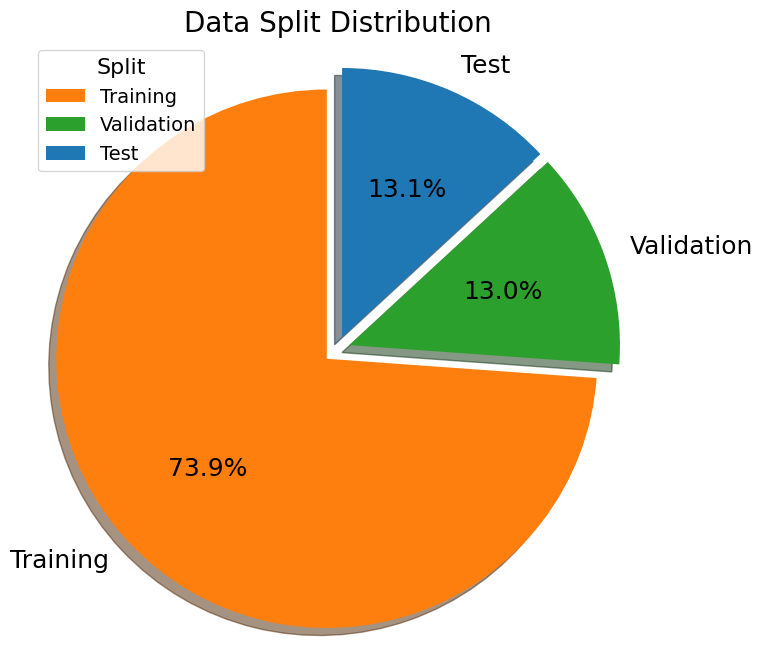

In [21]:
plt.figure(figsize=(8, 8))
split_sizes = [len(train_indices), len(validation_indices), len(test_indices)]
labels = [f'Training', f'Validation', f'Test']
colors = ['#ff7f0e', '#2ca02c', '#1f77b4']
explode = (0.05, 0.05, 0.05)

plt.pie(split_sizes, explode=explode, labels=labels, colors=colors,
                autopct='%1.1f%%', shadow=True, startangle=90, 
                textprops={'fontsize': 18})

# Add legend with larger font size
plt.legend(labels, title="Split", loc="upper left", fontsize=14, title_fontsize=16)

plt.axis('equal')
plt.title('Data Split Distribution', fontsize=20)
plt.savefig("data_split_distribution_pie.svg")
plt.show()